In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]=False
import seaborn as sns

In [2]:
titanic=sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
#1.deck컬럼을삭제하고 나이의 nan데이터를 평균값으로 채우시오.
titanic=titanic.drop("deck",axis=1)
mean=titanic["age"].mean()
titanic["age"]=titanic["age"].fillna(mean)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [4]:
#2.생존자와 사망자에 대한 수를 구하시오.
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [5]:
#3.등급별 생존평균을 구하시오.
titanic.groupby("pclass")[["survived"]].mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [6]:
#4.sibsp 생존 평균을 구하시오.
titanic[titanic["sibsp"]==1][["survived"]].mean()

survived    0.535885
dtype: float64

In [7]:
#5.혼자탑승한 인원의 생존 평균을 구하시오.
titanic[titanic["alone"]==True][["survived"]].mean()

survived    0.303538
dtype: float64

In [8]:
#6.성별 생존 평균을 구하시오.
titanic.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


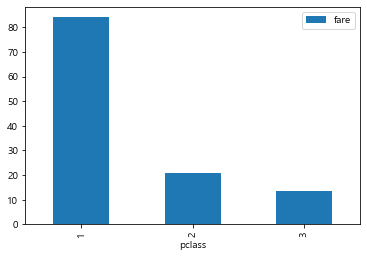

In [9]:
#7.등급별 티켓비용의 평균을 바차트로 그리시오.
titanic.groupby("pclass")[["fare"]].mean().plot(kind="bar")
plt.show()

In [10]:
#8.나이 분류 컬럼을 추가하시오.
titanic["나이분류"]=pd.cut(titanic["age"],[0,15,25,35,60,titanic["age"].max()],
      labels=['미성년자','청년','중년','장년','노년'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,나이분류
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,청년
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,장년
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,중년
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,중년
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True,중년
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,청년
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,중년
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,중년


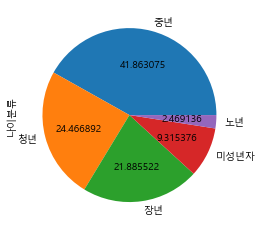

In [11]:
#9.나이분류를 파이차트로 표시하시오.
titanic["나이분류"].value_counts().plot(kind="pie",autopct="%f")
plt.show()

In [48]:
#10.생존율이 가장높은 나이분류를 구하시오. ??????
titanic.groupby("나이분류").mean()[["survived"]]

,survived
나이분류,
미성년자,0.590361
청년,0.344037
중년,0.361930
장년,0.400000
노년,0.227273


In [43]:
#성별, 나이분류별,등급(pclass)를 멀티인덱스로 평균생존을 값으로 표시하시오.
titanic.groupby(["sex","나이분류","pclass"])[["survived"]].mean()

survived
sex    나이분류 pclass          
female 미성년자 1       0.666667
            2       1.000000
            3       0.533333
       청년   1       0.960000
            2       0.947368
            3       0.485714
       중년   1       1.000000
            2       0.925926
            3       0.562500
       장년   1       0.972222
            2       0.850000
            3       0.142857
       노년   1       1.000000
            2            NaN
            3       1.000000
male   미성년자 1       1.000000
            2       1.000000
            3       0.321429
       청년   1       0.363636
            2       0.037037
            3       0.108911
       중년   1       0.404762
            2       0.119048
            3       0.141176
       장년   1       0.370370
            2       0.037037
            3       0.068182
       노년   1       0.083333
            2       0.333333
            3       0.000000